In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import numpy as np
import pandas as pd
%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)

from uriel import Uriel
from utils import fam
from papers import papers
from visualizations import show_methods, show_families, show_diff, show_languages

In [3]:
u = Uriel(load=True, umap=True)

In [4]:
def diagnose(paper):
    languages, scores = papers[paper]
    show_families(u, languages)
    show_languages(u, languages)
    show_methods(u, languages, scores, fam.gis)
    
def compare(paper, method1, method2):
    languages, scores = papers[paper]
    show_diff(u, languages, scores[:, method1], scores[:, method2])

- Most datasets seem to be stable
- There is no usually no particular difference between using GIS and Indo-European languages. Probably because there is not that many non-IE languages used.
- There are only two cases when I found a linguistic bias - Rahimi 2019 NER and Heinzerling 2019 POS. Are the difference statistically significant (especially in H- case)? Are there any other examples that have the same problems?
- There are not that many papers doing proper multilingual evaluation with all the scores reported. When a multilingual evaluation is done, usually it is not compared with different approaches since it is probably already hard to make it work with one approach.

# Rahimi 2019

[Massively Multilingual Transfer for NER](https://arxiv.org/pdf/1902.00193.pdf). 



They compare high-resource (1) and low-resource (2) training. Supervised multi-source transfer learning (3-6) and unsupervised multi-source transfer learning (7-13). We can see that unsupervised transfer learning is falling behind significantly on non-GIS languages compared to low-resource supervised learning. Compare 2 and 10, 10 is better by almost 8 F1, but it has almost identical performance for non-GIS languages. This contrast might be caused by small number of non-GIS languages in the training data. However, it might mislead people into over-confident assessment about transfer learning methods capabilities.

Compare the results with Figure 3 from the paper (reproduce below), which seems to be quite conclusive. They address the linguistic imbalance partially by saying _Further analysis show that majority voting works reasonably well for Romance and Germanic languages, which are well represented in the dataset, but fails miserably compared to single best for Slavic languages (e.g. ru, uk, bg) wherethere are only a few related languages._

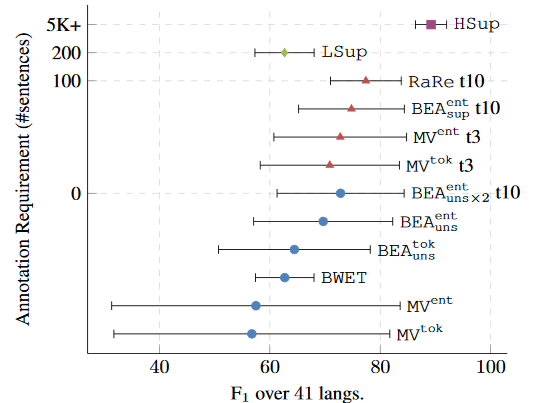

In [5]:
diagnose('rahimi_ner')

                      Family  Count  Ratio
0             Atlantic-Congo      0    0.0
1               Austronesian      3    7.5
2              Indo-European     29   72.5
3                     Slavic     10   25.0
4                   Germanic      6   15.0
5                     Italic      6   15.0
6               Afro-Asiatic      2    5.0
7                    Semitic      2    5.0
8               Sino-Tibetan      0    0.0
9   Nuclear_Trans_New_Guinea      0    0.0
10              Pama-Nyungan      0    0.0
11               Otomanguean      0    0.0
12             Austroasiatic      1    2.5
13                 Dravidian      1    2.5
14                    Turkic      1    2.5
15                    Uralic      3    7.5


Loading BokehJS ...

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
compare('rahimi_ner', 2, 11)

Loading BokehJS ...

# Heinzerling 2019

[Sequence Tagging with Contextual and Non-Contextual Subword Representations: A Multilingual Evaluation](https://arxiv.org/pdf/1906.01569.pdf)

But there seems to be a problem with POS tagging, which has smaller number of languages. Is it even statistically signficant? (only 6 non GRS languages). On the other hand, we can see that BERT (6) is much worse than the rest of the pack and its improvements (7 and 8.) are also on the bottom of the pack. Similarly to 9 and 10

**Note:** The original data had NRM for Norman Wikipedia, but NRM is the ISO-code for Narom language from Malaysia. NRM was changed to NRF (Norman ISO code) in the data. Similarly ARC (Old Aramaic) was corrected to SYR (Syriac). 

In [7]:
diagnose('heinzerling_ner')

                      Family  Count      Ratio
0             Atlantic-Congo     24   9.056604
1               Austronesian     25   9.433962
2              Indo-European    103  38.867925
3                     Slavic     17   6.415094
4                   Germanic     24   9.056604
5                     Italic     22   8.301887
6               Afro-Asiatic     10   3.773585
7                    Semitic      6   2.264151
8               Sino-Tibetan      7   2.641509
9   Nuclear_Trans_New_Guinea      0   0.000000
10              Pama-Nyungan      0   0.000000
11               Otomanguean      0   0.000000
12             Austroasiatic      2   0.754717
13                 Dravidian      4   1.509434
14                    Turkic     17   6.415094
15                    Uralic     12   4.528302
Language Limburgish (lim) not supported. It will be removed from visualization
Language Occidental (ile) not supported. It will be removed from visualization
Language Picard (pcd) not supported. It wil

Loading BokehJS ...

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [25]:
diagnose('heinzerling_pos')

                      Family  Count      Ratio
0             Atlantic-Congo      0   0.000000
1               Austronesian      1   4.761905
2              Indo-European     17  80.952381
3                     Slavic      5  23.809524
4                   Germanic      6  28.571429
5                     Italic      4  19.047619
6               Afro-Asiatic      1   4.761905
7                    Semitic      1   4.761905
8               Sino-Tibetan      0   0.000000
9   Nuclear_Trans_New_Guinea      0   0.000000
10              Pama-Nyungan      0   0.000000
11               Otomanguean      0   0.000000
12             Austroasiatic      0   0.000000
13                 Dravidian      0   0.000000
14                    Turkic      0   0.000000
15                    Uralic      1   4.761905


Loading BokehJS ...

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [24]:
compare('heinzerling_pos', 0, 10)

Loading BokehJS ...

# Artetxe 2020

[Translation Artifacts in Cross-lingual Transfer Learning](https://www.aclweb.org/anthology/2020.emnlp-main.618.pdf)

XNLI seems to be quite stable - GIS only 39%

In [43]:
diagnose('artetxe_nli')

                      Family  Count      Ratio
0             Atlantic-Congo      1   6.666667
1               Austronesian      0   0.000000
2              Indo-European      9  60.000000
3                     Slavic      2  13.333333
4                   Germanic      2  13.333333
5                     Italic      2  13.333333
6               Afro-Asiatic      1   6.666667
7                    Semitic      1   6.666667
8               Sino-Tibetan      1   6.666667
9   Nuclear_Trans_New_Guinea      0   0.000000
10              Pama-Nyungan      0   0.000000
11               Otomanguean      0   0.000000
12             Austroasiatic      1   6.666667
13                 Dravidian      0   0.000000
14                    Turkic      1   6.666667
15                    Uralic      0   0.000000


Loading BokehJS ...

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [78]:
compare('artetxe_nli', 1, 8)

Loading BokehJS ...

In [44]:
diagnose('artetxe_nli_2')

                      Family  Count      Ratio
0             Atlantic-Congo      1   6.666667
1               Austronesian      0   0.000000
2              Indo-European      9  60.000000
3                     Slavic      2  13.333333
4                   Germanic      2  13.333333
5                     Italic      2  13.333333
6               Afro-Asiatic      1   6.666667
7                    Semitic      1   6.666667
8               Sino-Tibetan      1   6.666667
9   Nuclear_Trans_New_Guinea      0   0.000000
10              Pama-Nyungan      0   0.000000
11               Otomanguean      0   0.000000
12             Austroasiatic      1   6.666667
13                 Dravidian      0   0.000000
14                    Turkic      1   6.666667
15                    Uralic      0   0.000000


Loading BokehJS ...

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Huang 2019

[Unicoder: A Universal Language Encoder by Pre-training with Multiple Cross-lingual Tasks](https://arxiv.org/abs/1909.00964)

Similarly to Artetxe above, NLI seems to be stable

In [45]:
diagnose('huang_nli')

                      Family  Count      Ratio
0             Atlantic-Congo      1   6.666667
1               Austronesian      0   0.000000
2              Indo-European      9  60.000000
3                     Slavic      2  13.333333
4                   Germanic      2  13.333333
5                     Italic      2  13.333333
6               Afro-Asiatic      1   6.666667
7                    Semitic      1   6.666667
8               Sino-Tibetan      1   6.666667
9   Nuclear_Trans_New_Guinea      0   0.000000
10              Pama-Nyungan      0   0.000000
11               Otomanguean      0   0.000000
12             Austroasiatic      1   6.666667
13                 Dravidian      0   0.000000
14                    Turkic      1   6.666667
15                    Uralic      0   0.000000


Loading BokehJS ...

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Longpre 2020

[MKQA: A Linguistically Diverse Benchmark for Multilingual Open Domain Question Answering](https://arxiv.org/pdf/2007.15207.pdf)

There are slight changes in EM score between some models, but nothing dramatical going on here. F1 looks particularly stable.

In [46]:
diagnose('longpre_qa_em')

                      Family  Count      Ratio
0             Atlantic-Congo      0   0.000000
1               Austronesian      1   4.166667
2              Indo-European     11  45.833333
3                     Slavic      2   8.333333
4                   Germanic      5  20.833333
5                     Italic      4  16.666667
6               Afro-Asiatic      2   8.333333
7                    Semitic      2   8.333333
8               Sino-Tibetan      3  12.500000
9   Nuclear_Trans_New_Guinea      0   0.000000
10              Pama-Nyungan      0   0.000000
11               Otomanguean      0   0.000000
12             Austroasiatic      1   4.166667
13                 Dravidian      0   0.000000
14                    Turkic      1   4.166667
15                    Uralic      2   8.333333


Loading BokehJS ...

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [47]:
diagnose('longpre_qa_f1')

                      Family  Count      Ratio
0             Atlantic-Congo      0   0.000000
1               Austronesian      1   4.166667
2              Indo-European     11  45.833333
3                     Slavic      2   8.333333
4                   Germanic      5  20.833333
5                     Italic      4  16.666667
6               Afro-Asiatic      2   8.333333
7                    Semitic      2   8.333333
8               Sino-Tibetan      3  12.500000
9   Nuclear_Trans_New_Guinea      0   0.000000
10              Pama-Nyungan      0   0.000000
11               Otomanguean      0   0.000000
12             Austroasiatic      1   4.166667
13                 Dravidian      0   0.000000
14                    Turkic      1   4.166667
15                    Uralic      2   8.333333


Loading BokehJS ...

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Wang 2020

[Extending Multilingual BERT to Low-Resource Languages](https://arxiv.org/pdf/2004.13640.pdf)

Very diverse set of languages. No bias there. They use some languages as source languages (Sinhala, Hindi), but I have not found any bias coming from these either.

In [48]:
diagnose('wang_ner')

                      Family  Count      Ratio
0             Atlantic-Congo      6  22.222222
1               Austronesian      2   7.407407
2              Indo-European      6  22.222222
3                     Slavic      1   3.703704
4                   Germanic      0   0.000000
5                     Italic      1   3.703704
6               Afro-Asiatic      6  22.222222
7                    Semitic      3  11.111111
8               Sino-Tibetan      1   3.703704
9   Nuclear_Trans_New_Guinea      0   0.000000
10              Pama-Nyungan      0   0.000000
11               Otomanguean      0   0.000000
12             Austroasiatic      0   0.000000
13                 Dravidian      1   3.703704
14                    Turkic      3  11.111111
15                    Uralic      1   3.703704


Loading BokehJS ...

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [79]:
compare('wang_ner', 1, 3)

Loading BokehJS ...

# _UD_ performance

There are some underperformers, e.g. _SLT-Interactions (Bengaluru)_ seems really GIS-oriented compared to _IBM NY (Yorktown Heights)_. But we are talking about $\pm2\%$.

In [49]:
diagnose('ud')

                      Family  Count      Ratio
0             Atlantic-Congo      0   0.000000
1               Austronesian      1   1.219512
2              Indo-European     61  74.390244
3                     Slavic     17  20.731707
4                   Germanic     18  21.951220
5                     Italic     15  18.292683
6               Afro-Asiatic      2   2.439024
7                    Semitic      2   2.439024
8               Sino-Tibetan      1   1.219512
9   Nuclear_Trans_New_Guinea      0   0.000000
10              Pama-Nyungan      0   0.000000
11               Otomanguean      0   0.000000
12             Austroasiatic      1   1.219512
13                 Dravidian      0   0.000000
14                    Turkic      3   3.658537
15                    Uralic      6   7.317073


Loading BokehJS ...

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [80]:
compare('ud', 23, 15)

Loading BokehJS ...